In [2]:
# import all dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Clean Up Process

In [3]:
apple_store = pd.read_csv('Resources/AppleStore.csv')
google_store = pd.read_csv('Resources/googleplaystore.csv')


In [4]:
apple_store.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
google_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device
1,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0+,Paid,$1.49,Everyone,Personalization,11-Jul-18,1.1,4.2 and up
2,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0+,Paid,$13.99,Teen,Social,28-Jul-17,3.4.4.3.3,4.1 and up
3,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0+,Paid,$1.99,Everyone,Education,30-Jul-17,1.3,4.0 and up
4,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0+,Paid,$2.99,Everyone,Education,15-Apr-16,1,3.0 and up


In [6]:
apple_store.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [7]:
# Clean up the apple store table
app_store1 = apple_store.drop(['Unnamed: 0', 'id', 'currency', 'rating_count_ver', 'user_rating_ver',
                              'ver', 'sup_devices.num', 'ipadSc_urls.num', 'vpp_lic'], axis=1)
app_store1.head()


,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [8]:
app_store = app_store1.rename(columns={'track_name':'App', 'size_bytes': 'Size', 'price': 'Price', 'prime_genre': 'Genre', 'rating_count_tot': 'user_rating','user_rating': 'Ratings', 'cont_rating': 'Content Rating', 'lang.num': 'language'}, inplace=True)
app_store1.head()


,App,Size,Price,user_rating,Ratings,Content Rating,Genre,language
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [9]:
# clean up the Google Play store table
google_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
# clean up the Google Play store table
play_store = google_store.drop(['Category', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
play_store.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Command & Conquer: Rivals,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy
1,Popsicle Launcher for Android P 9.0 launcher,NaN,0,5.5M,0+,Paid,$1.49,Everyone,Personalization
2,Ak Parti Yardım Toplama,NaN,0,8.7M,0+,Paid,$13.99,Teen,Social
3,AP Series Solution Pro,NaN,0,7.4M,0+,Paid,$1.99,Everyone,Education
4,Ain Arabic Kids Alif Ba ta,NaN,0,33M,0+,Paid,$2.99,Everyone,Education


In [56]:
play_store.Price = play_store.Price.apply(lambda x: str(x).replace("Everyone","0"))

In [57]:
play_store.Price = play_store.Price.apply(lambda x: str(x).replace("$",""))
play_store['Price'] = pd.to_numeric(play_store['Price'])

# Application Categories

### Apple Store

In [11]:
# List of unique values
app_store1.Genre.unique()


array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [12]:
# count the number of unique values
app_category = app_store1.Genre.value_counts()
app_store_cat = app_category.nlargest(5)

In [13]:
percent = 100 * app_store_cat/app_store_cat.sum()
percent

Games            70.901414
Entertainment     9.821920
Education         8.316504
Photo & Video     6.407197
Utilities         4.552965
Name: Genre, dtype: float64

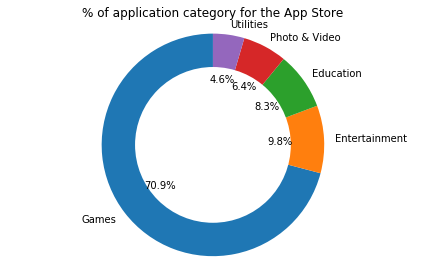

<Figure size 432x288 with 0 Axes>

In [14]:
# construct the pie chart for App Store

labels = ['Games', 'Entertainment', 'Education', 'Photo & Video','Utilities']
sizes = percent

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('% of application category for the App Store')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('app_category.png')


### Google Play Store

In [15]:
# Google Play Store Pie Chart
play_store.Genres.unique()

array(['Strategy', 'Personalization', 'Social', 'Education',
       'Productivity', 'Business', 'News & Magazines', 'Art & Design',
       'Travel & Local', 'Medical', 'Finance', 'Lifestyle',
       'Books & Reference', 'Communication', 'Entertainment', 'Arcade',
       'Photography', 'Tools', 'Video Players & Editors',
       'Auto & Vehicles', 'Beauty', 'Comics', 'Dating',
       'Education;Education', 'Education;Creativity',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Entertainment;Music & Video',
       'Events', 'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Action', 'Casual', 'Puzzle', 'Racing',
       'Sports', 'Simulation', 'Role Playing', 'Casual;Brain Games',
       'Educational;Education', 'Educational;Brain Games',
       'Entertainment;Education', 'Casual;Education',
       'Casual;Pretend Play', 'Educational;Pretend Play',


In [16]:
play_category = play_store.Genres.value_counts()
play_store_cat = play_category.nlargest(10)
play_store_cat

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

In [17]:
percent2 = 100 * play_store_cat/play_store_cat.sum()
percent2

Tools              17.117300
Entertainment      12.665176
Education          11.160805
Medical             9.412482
Business            9.351494
Productivity        8.619638
Sports              8.091075
Personalization     7.969099
Communication       7.867453
Lifestyle           7.745477
Name: Genres, dtype: float64

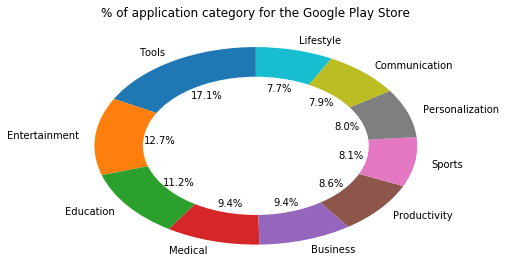

<Figure size 432x288 with 0 Axes>

In [18]:
labels = ['Tools', 'Entertainment', 'Education', 'Medical','Business', 'Productivity', 
          'Sports', 'Personalization', 'Communication', 'Lifestyle']
sizes = percent2

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('% of application category for the Google Play Store')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('play_category.jpg')

# Application Price Range

### Apple Store

In [28]:
app_free = sum(app_store1.Price == 0)
max_price_app = max(app_store1.Price)
print('The total of free apps for apple store:', app_free)
print('The maximum price of applications in the apple store:', max_price_app)

The total of free apps for apple store: 4056
The maximum price of applications in the apple store: 299.99


In [37]:

app_price_list = app_store1['Price'].value_counts(dropna=False)
app_price_list

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: Price, dtype: int64

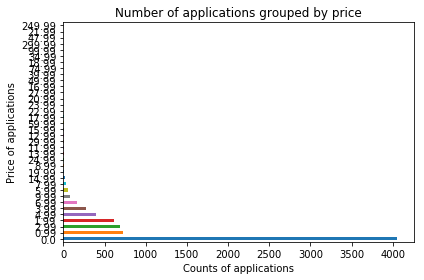

<Figure size 432x288 with 0 Axes>

In [45]:
# Bar graph is representing the applications that is available in the apple store.

app_store1['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('app_price.jpg')

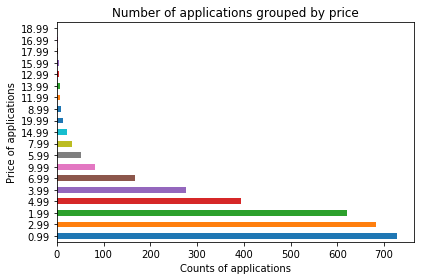

<Figure size 432x288 with 0 Axes>

In [69]:
# Bar graph of the applications in the apple store without free applications
paid_app_store = app_store1[((app_store1.Price > 0) & (app_store1.Price < 20))]

paid_app_store['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('app_price_no0.jpg')

### Google Play Store

In [58]:
play_free = sum(play_store.Price == 0)
max_price_play = max(play_store.Price)
print('The total of free apps for apple store:', play_free)
print('The maximum price of applications in the apple store:', max_price_play)

The total of free apps for apple store: 10041
The maximum price of applications in the apple store: 400.0


In [59]:
play_price_list = play_store['Price'].value_counts(dropna=False)
play_price_list

0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
7.99          7
29.99         7
3.49          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
2.00          3
16.99         3
1.00          3
10.00         3
33.99         2
9.00          2
          ...  
3.08          1
4.80          1
18.99         1
1.96          1
109.99        1
15.46         1
3.28          1
299.99        1
2.56          1
3.90          1
19.40         1
74.99         1
4.59          1
19.90         1
2.90          1
89.99         1
400.00        1
30.99         1
4.85          1
1.20          1
37.99         1
25.99         1
15.99         1
379.99        1
154.99        1
1.59          1
46.99         1
1.61          1
28.99         1
1.04          1
Name: Price, Length: 92,

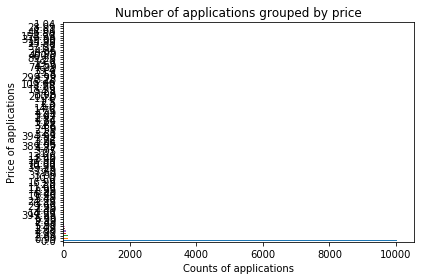

<Figure size 432x288 with 0 Axes>

In [60]:
# plot bar graph for google play applications

play_store['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('play_price.jpg')

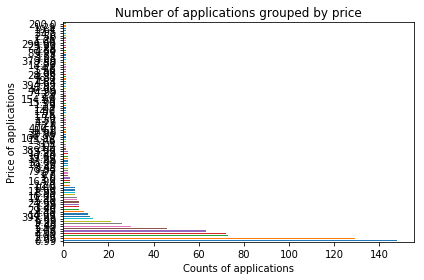

<Figure size 432x288 with 0 Axes>

In [61]:
# Bar graph of the applications in the apple store without free applications
paid_play_store = play_store[(play_store.Price > 0)]

paid_play_store['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('play_price_no0.jpg')

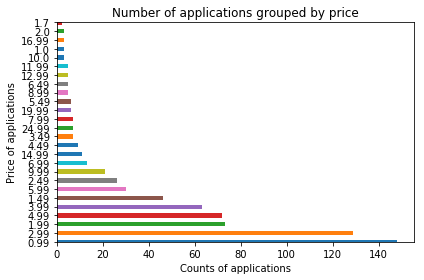

<Figure size 432x288 with 0 Axes>

In [68]:
paid_play_store = play_store[((play_store.Price > 0) & (play_store.Price < 25))]

paid_play_store['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
plt.ylim(0.0, 25)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('play_price_0_25.jpg')

# User Rating VS Category

### Apple Store

In [71]:
app_store1.Ratings.value_counts()


4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: Ratings, dtype: int64

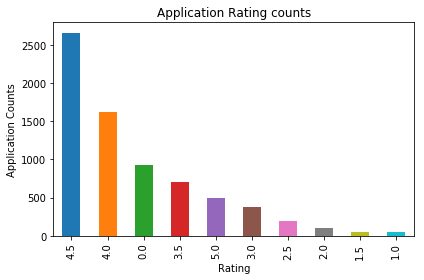

<Figure size 432x288 with 0 Axes>

In [74]:
app_store1['Ratings'].value_counts().plot(kind='bar')
plt.title('Application Rating counts')
plt.xlabel('Rating')
plt.ylabel('Application Counts')

ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('app_rating.jpg')


### Play Store

In [77]:
play_store.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

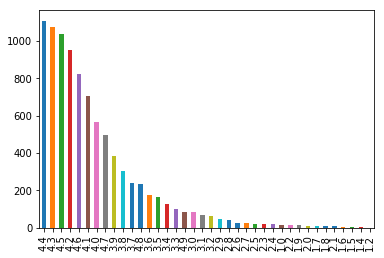

In [90]:
play_rating = play_store[(play_store.Rating < 5)]
play_rating['Rating'].value_counts().plot(kind='bar')